In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
import random
from scipy import linalg
import math 

In [84]:
df = pd.read_csv("Spotify 2010 - 2019 Top 100.csv")

In [87]:
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


In [88]:
df = df.dropna()

In [89]:
#add intercept
df['intercept'] = 1

In [90]:
#get response y
y = df[['pop']]

#get the features X with an intercept added
X = df[['intercept','bpm', 
    'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

In [91]:
df1= pd.concat([y, X], axis = 1)

In [105]:
df1.head()

,pop,intercept,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,70.0,1,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0
1,68.0,1,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0
2,72.0,1,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0
3,80.0,1,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0
4,79.0,1,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0


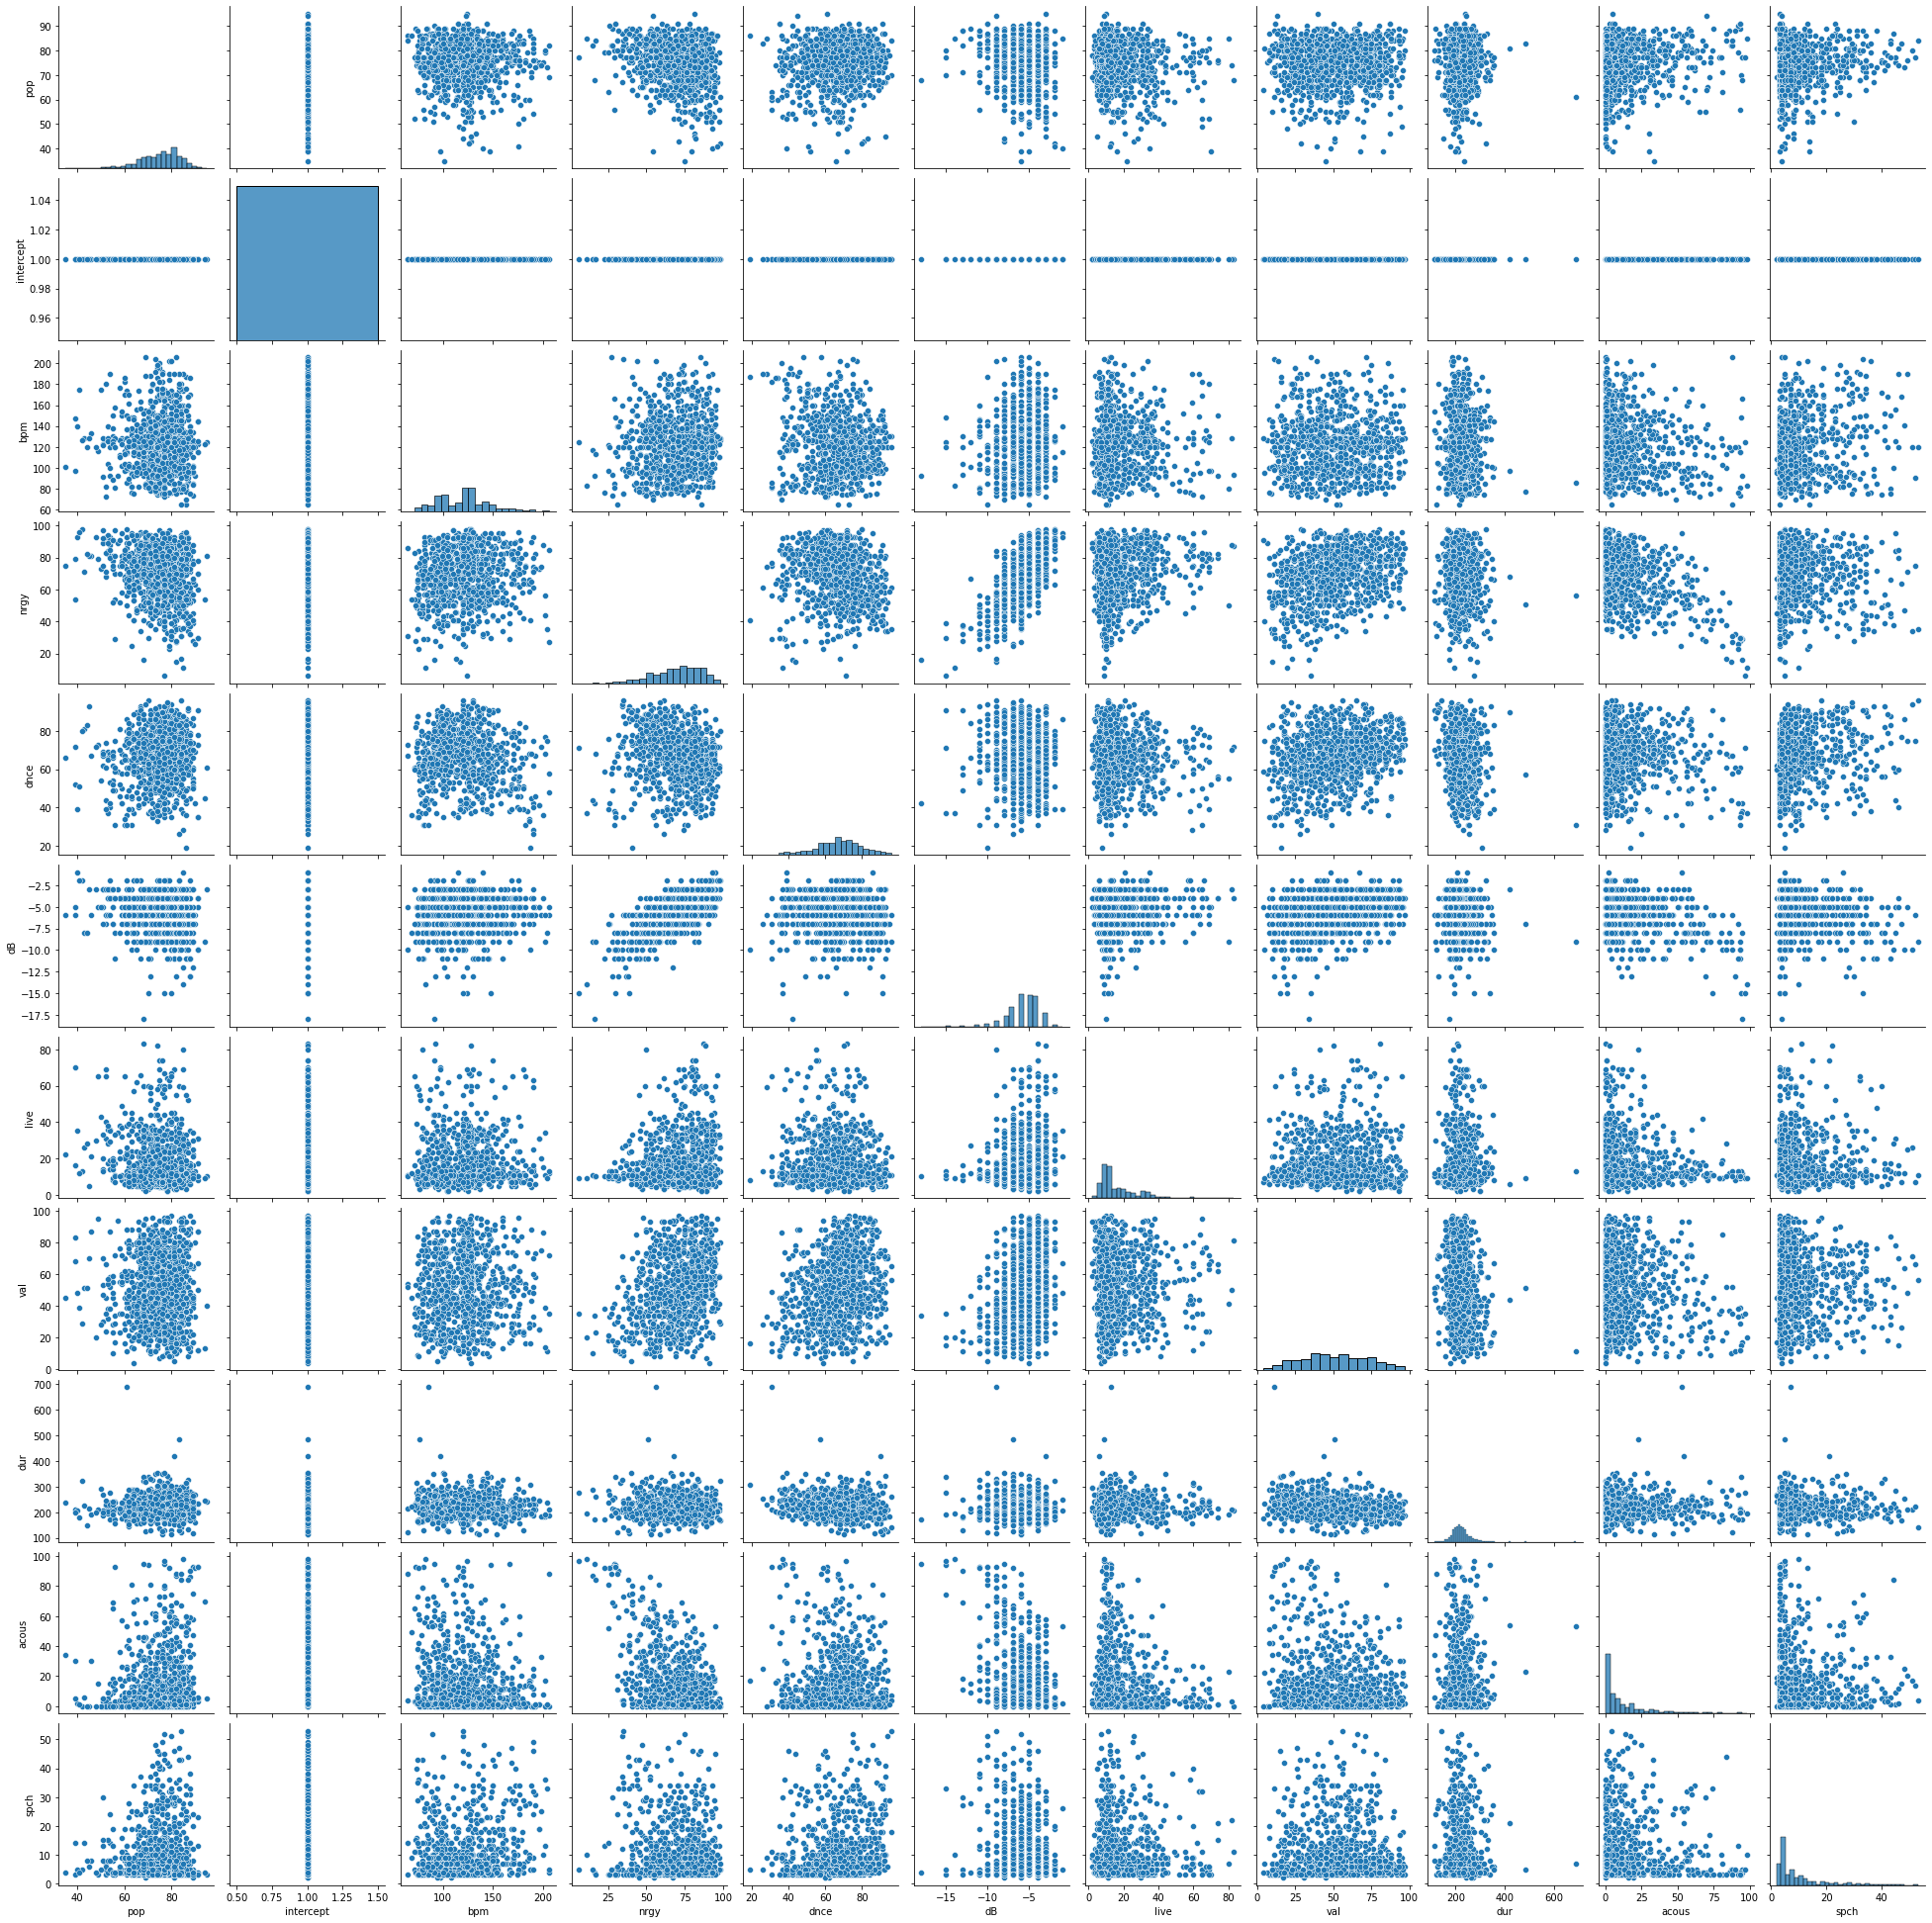

In [93]:
sns.pairplot(df1)

In [95]:
df1.corr()

,pop,intercept,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
pop,1.000000,NaN,-0.025058,-0.234011,0.093176,-0.145403,-0.137305,-0.003752,0.009219,0.128195,0.061441
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,-0.025058,NaN,1.000000,0.118557,-0.111660,0.089568,0.014672,0.021128,-0.016536,-0.124614,0.149368
nrgy,-0.234011,NaN,0.118557,1.000000,-0.129279,0.713428,0.184094,0.372866,-0.049662,-0.504083,-0.099790
dnce,0.093176,NaN,-0.111660,-0.129279,1.000000,-0.040538,-0.113324,0.264781,-0.168483,-0.075999,0.161734
dB,-0.145403,NaN,0.089568,0.713428,-0.040538,1.000000,0.128134,0.317128,-0.082541,-0.392393,-0.165838
live,-0.137305,NaN,0.014672,0.184094,-0.113324,0.128134,1.000000,0.028092,-0.003094,-0.116081,0.043516
val,-0.003752,NaN,0.021128,0.372866,0.264781,0.317128,0.028092,1.000000,-0.185863,-0.164048,0.013192
dur,0.009219,NaN,-0.016536,-0.049662,-0.168483,-0.082541,-0.003094,-0.185863,1.000000,0.026474,-0.035451
acous,0.128195,NaN,-0.124614,-0.504083,-0.075999,-0.392393,-0.116081,-0.164048,0.026474,1.000000,-0.010204


In [96]:
df1.describe()

,pop,intercept,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
count,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,74.840000,1.0,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000
std,8.807836,0.0,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743
min,35.000000,1.0,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000
25%,70.000000,1.0,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000
50%,76.000000,1.0,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000
75%,81.000000,1.0,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000
max,95.000000,1.0,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000


In [110]:
df1.head()

,pop,intercept,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,70.0,1,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0
1,68.0,1,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0
2,72.0,1,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0
3,80.0,1,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0
4,79.0,1,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0


### stimulation study

In [113]:
#num of observations
n = df1.shape[0]
p = df1.shape[1]

random.seed(2022)

X = np.random.randn(n*p).reshape(n, p)

In [114]:
X

array([[-0.48720138,  0.53107013, -0.49053588, ..., -0.08153283,
         0.59744749,  1.70381865],
       [ 2.22011695,  0.28820182, -0.88702717, ...,  0.82430443,
        -0.55517313,  1.74617001],
       [ 0.37608346,  1.71955901, -0.87309601, ...,  2.05800393,
        -0.62093044,  0.92352594],
       ...,
       [ 0.33374876, -2.4647938 ,  0.88119042, ..., -0.22146549,
        -0.6501491 ,  0.79711461],
       [-0.64900108,  0.06361197, -0.68728771, ..., -1.16694206,
         1.48492907, -0.73817738],
       [-2.97295668,  2.36152967, -0.39676848, ..., -0.06642633,
         1.15661482, -1.76309062]])

In [117]:
beta = np.repeat(3, p)
sigma = 1

In [123]:
y = X @ beta + np.random.normal(0, sigma, size = n)

In [137]:
beta_est = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

In [143]:
sigma_est = math.sqrt(((y - X@beta_est).transpose() @ (y - X@beta_est))/n)

In [146]:
print('true beta', beta ,'\n' 'est beta : ', beta_est)

true beta [3 3 3 3 3 3 3 3 3 3 3] 
est beta :  [2.93816319 3.05302595 3.0379191  2.99812548 2.98944896 2.99693976
 2.97160635 3.03576319 2.96734534 2.99980471 2.99260419]


In [147]:
print('true sigma', sigma, '\n' 'est sigma : ', sigma_est)

true sigma 1 
est sigma :  1.0033935480370588


In [154]:
# Y is an n by num_datasets matrix
num_datasets = 100

y_bar = X @ beta

Y = pd.DataFrame([y_bar + np.random.normal(0, sigma, size = n) for i in range(num_datasets)]).transpose()
Y

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,17.477684,16.627669,17.703264,16.332345,15.512689,16.705888,17.422882,16.121584,16.505378,17.173935,...,14.654636,18.158513,17.621583,15.537591,17.373350,16.596256,16.556362,16.453434,17.617488,15.610541
1,19.514232,18.269586,18.476050,18.048910,20.901476,18.087736,18.063135,19.563861,20.311862,19.164662,...,19.577837,19.800548,18.677764,18.486881,20.536030,18.646541,18.738582,20.229562,20.071721,20.906385
2,12.797814,13.605947,13.504106,11.834298,11.410553,12.333809,12.413232,11.926272,13.226717,12.386522,...,15.026654,12.171553,12.028406,11.690508,12.246866,12.437886,13.469762,10.958320,13.691620,12.247483
3,2.175552,1.988926,0.844807,1.706874,-0.169423,0.355069,1.148972,1.503383,0.198234,1.386636,...,1.874552,1.834375,0.552529,-0.457731,-0.107831,-0.827580,0.562304,0.032355,1.433809,1.263907
4,-3.746462,-4.724611,-4.376221,-5.200872,-4.639389,-4.763253,-6.174345,-4.589674,-4.961104,-4.867336,...,-3.427309,-8.142912,-5.505083,-4.964849,-3.880332,-6.177144,-5.505722,-5.004126,-6.024708,-6.197624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.487850,0.466525,-1.363541,-4.830974,-1.609302,-3.171800,-2.187649,-0.065254,0.310971,-1.604043,...,-2.007073,-2.562002,-2.706069,-0.685439,-3.372135,-1.248692,0.126764,-0.687510,-0.156959,-0.311833
996,15.550031,16.185753,15.580655,15.948552,13.106117,15.380493,14.835631,15.837737,15.752943,16.044291,...,14.594742,14.035130,15.049235,13.232978,14.250072,14.741958,15.996350,16.303149,15.577481,17.453197
997,-4.229998,-4.520230,-2.813249,-4.533218,-2.949671,-5.350036,-4.213262,-2.475099,-1.608886,-4.831343,...,-2.955594,-4.179359,-3.942394,-4.308599,-3.621198,-4.378009,-3.908891,-4.200826,-4.153540,-4.167872
998,-3.378257,-2.424605,-2.350081,-1.652959,-3.236763,-3.764829,-2.838795,-3.950879,-3.635623,-1.434512,...,-1.495020,-1.928546,-3.399802,-1.914785,-2.292266,-1.366926,-2.081263,-2.703642,-2.437581,-2.841648


In [159]:
Beta = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ Y
Sigma = np.sqrt(((Y - X @ Beta)**2).sum(axis = 0)/n)


In [160]:
Beta

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.970844,3.031353,2.961622,2.980917,2.946487,3.026045,2.985159,3.026974,2.985613,2.999566,...,2.999421,3.034637,2.989228,2.978534,2.981672,2.958129,3.044259,3.034686,2.968744,3.045533
1,2.997068,2.948902,3.002972,2.994168,2.972494,2.991343,2.964554,2.955690,3.015677,3.085073,...,3.056341,3.064625,2.968122,3.050447,2.949773,3.019261,3.008011,3.046344,3.034458,2.953170
2,2.987986,2.967115,3.009065,2.974509,2.978074,2.985024,2.974630,3.061152,2.990994,2.996369,...,3.011936,2.999705,3.035293,2.977087,2.994093,2.985861,2.964396,2.978341,2.989965,3.040948
3,3.007749,2.954740,2.914854,3.034313,2.987688,3.035350,2.978808,2.995520,3.068480,3.002418,...,2.960081,3.007645,2.995790,2.968613,2.974882,3.032678,2.996052,3.047164,3.039620,3.074459
4,3.004763,3.019107,3.010344,3.042829,2.935110,2.976964,3.007042,2.967144,3.041326,2.981240,...,3.105641,3.026059,2.926604,3.042112,3.038610,3.010774,2.985673,2.978793,3.032037,3.010168
5,2.978964,3.010469,2.995597,3.037090,3.018250,2.974215,2.996791,2.996210,2.988723,3.015910,...,2.989808,3.004395,3.014753,2.973803,3.033964,3.064012,2.973613,3.003984,2.994628,2.998212
6,2.974575,3.006593,2.998215,2.983483,2.993577,3.004337,3.052154,3.031593,2.950451,3.019809,...,2.991485,3.000469,3.007267,3.020539,3.004638,3.004474,2.976480,3.037640,2.965715,3.018047
7,3.009077,2.986789,2.995486,2.995492,2.973723,3.000530,3.030449,2.947866,3.054870,3.041060,...,3.054341,3.022721,2.998876,2.993783,2.980079,2.968990,2.995402,2.991634,3.037860,2.975482
8,3.010315,2.998715,3.010586,3.004198,2.982326,3.022164,2.951297,3.009579,2.976714,3.073867,...,2.980466,3.006508,2.979410,3.017225,3.005904,3.013467,2.983779,3.011310,2.925707,3.060220
9,3.056699,3.018285,3.026143,2.943607,2.988619,2.996968,2.948170,3.012456,2.987198,2.996478,...,2.982623,3.067152,3.015285,2.966124,3.005231,2.985166,2.979208,2.985951,3.037988,2.983372


In [164]:
Beta_df = Beta.transpose()

In [175]:
Beta_df

,0,1,2,3,4,5,6,7,8,9,10
0,2.970844,2.997068,2.987986,3.007749,3.004763,2.978964,2.974575,3.009077,3.010315,3.056699,3.028302
1,3.031353,2.948902,2.967115,2.954740,3.019107,3.010469,3.006593,2.986789,2.998715,3.018285,2.986674
2,2.961622,3.002972,3.009065,2.914854,3.010344,2.995597,2.998215,2.995486,3.010586,3.026143,3.012673
3,2.980917,2.994168,2.974509,3.034313,3.042829,3.037090,2.983483,2.995492,3.004198,2.943607,2.953196
4,2.946487,2.972494,2.978074,2.987688,2.935110,3.018250,2.993577,2.973723,2.982326,2.988619,2.985075
...,...,...,...,...,...,...,...,...,...,...,...
95,2.958129,3.019261,2.985861,3.032678,3.010774,3.064012,3.004474,2.968990,3.013467,2.985166,3.014055
96,3.044259,3.008011,2.964396,2.996052,2.985673,2.973613,2.976480,2.995402,2.983779,2.979208,3.029352
97,3.034686,3.046344,2.978341,3.047164,2.978793,3.003984,3.037640,2.991634,3.011310,2.985951,2.943334
98,2.968744,3.034458,2.989965,3.039620,3.032037,2.994628,2.965715,3.037860,2.925707,3.037988,2.977491


In [180]:
gat = pd.melt(Beta_df.reset_index(), id_vars="index").drop('index', axis = 1)

#df.reset_index(), id_vars='index',value_vars=['asset1','asset2']

In [181]:
gat.head(20)

,variable,value
0,0,2.970844
1,0,3.031353
2,0,2.961622
3,0,2.980917
4,0,2.946487
5,0,3.026045
6,0,2.985159
7,0,3.026974
8,0,2.985613
9,0,2.999566


In [188]:
from plotnine import ggplot, aes, stat_bin, geom_bar, geom_histogram, facet_wrap, geom_vline

C:\Users\ykw22\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\ykw22\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\ykw22\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\ykw22\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


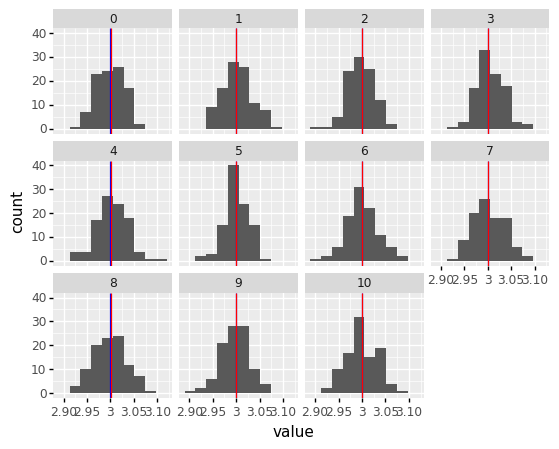

<ggplot: (146935883054)>

In [205]:
ggplot(gat) + aes(gat['value']) + stat_bin(bins=10) + geom_bar() + facet_wrap('variable') + geom_vline(aes(xintercept = 3.0), color = 'blue') + geom_vline(aes(xintercept = gat.value.mean()) , color = 'red')

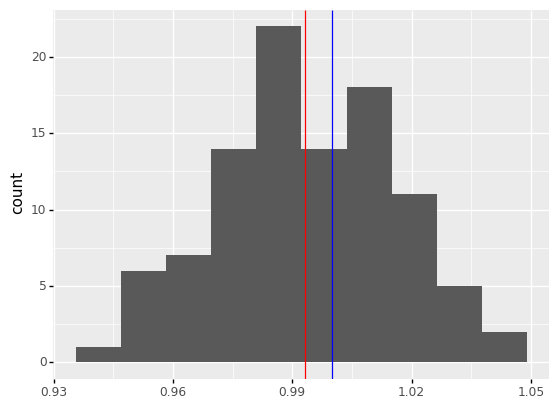

<ggplot: (146936263617)>

In [206]:
ggplot() + geom_histogram(aes(Sigma),bins = 10) + geom_vline(aes(xintercept = 1.0), color = 'blue')+geom_vline(aes(xintercept = Sigma.mean()), color = 'red')